## Lab 5 Final Report

### By: Kayla Casey and Sarah Haddix

We started this lab early, but unfortunately were unable to successfully run our code on the adams server due to outages and permission issues. However, Sarah has devices with both SSD and HDD storage, and was able to locally run our code. Most of the tests worked correctly, but you will notice that for the IO Stride Write test, it was unable to successfully run on HDD.

In the graphs, device 0 corresponds to HDD and device 1 corresponds to SSD. If you would like to reproduce our graphs, run the code as ```python3 plots-io.py``` and ```python3 plots-stride.py```.

Enjoy our analysis!

---
### Test 1: I/O Size Read

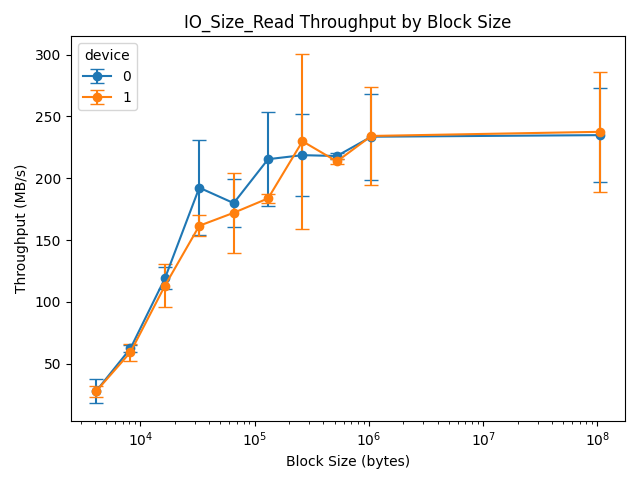

In [19]:
from IPython.display import display, Image

file_path = 'graphs/IO_Size_Read_Overlayed.png'
display(Image(filename=file_path))

### Graph 1 Observations
This graph shows the relationship between block size and read throughput for both devices. Throughput increases significantly with block size up to around $10^6$ bytes, where it then plateaus. The confidence intervals are larger for larger block sizes, indicating greater variability. The "optimal" I/O block size appears to be around $10^6$ bytes, as the throughput reaches a plateau beyond this point.

#### Key Takeaways:
- Larger block sizes result in higher throughput, which we believe is due to reduced overhead for each read operation.
- The stabilization at $10^6$ bytes suggests a point of diminishing returns where increasing the block size further does not significantly improve throughput.
- For file systems or applications, a block size around $10^6$ bytes might be a good choice for optimal performance.
- There is not a huge different between HDD and SSD devices throughput for I/O reads.

---
### Test 2: I/O Size Write

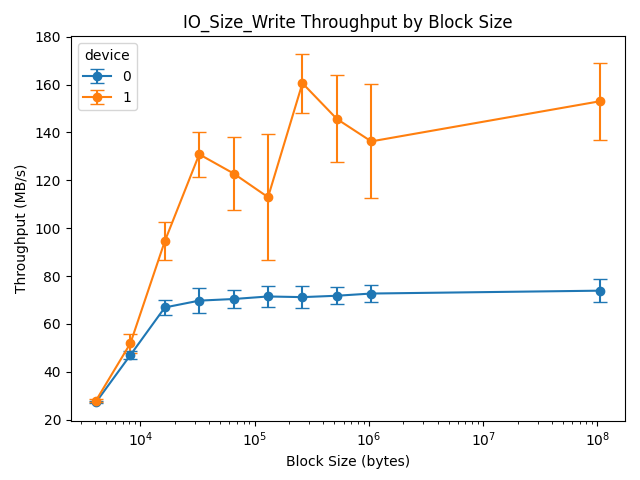

In [20]:
file_path = 'graphs/IO_Size_Write_Overlayed.png'
display(Image(filename=file_path))


### Graph 2 Observations
The second graph shows a similar trend for write throughput, though the plateau occurs at slightly lower throughput levels compared to reads. The big difference seen in this graph is how the performace for HDD plateaus with significantly lower throughput before SSD plateaus. SSD sees more variability in throughput at larger block sizes, reflected by wider confidence intervals and changes in mean throughput.

#### Key Takeaways:
- Writes are less efficient than reads, possibly due to additional overhead such as cache flushing or data integrity checks.
- The optimal block size for writes aligns with the read results for SSD, around $10^6$ bytes.
- The optimal block size for writes on HDD is around $10^5$ bytes.
- Applications performing write-heavy tasks might need additional optimization to reduce variability at larger block sizes.
- Throughput for SSD is much higher for I/O writes than it is for HDD after using block sizes of $10^5$ bytes.

---
### Test 3: I/O Stride Read

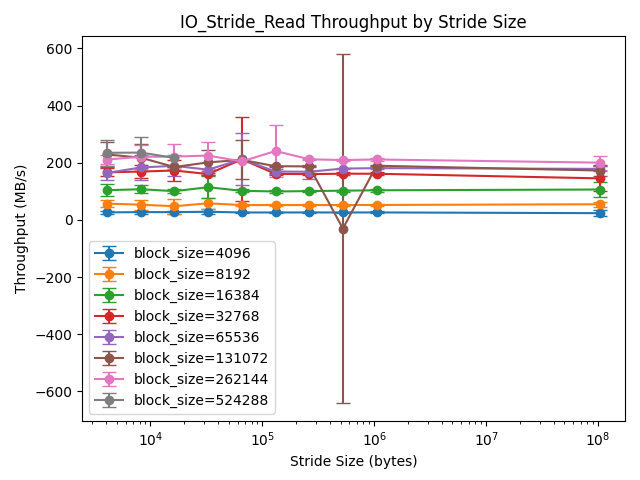

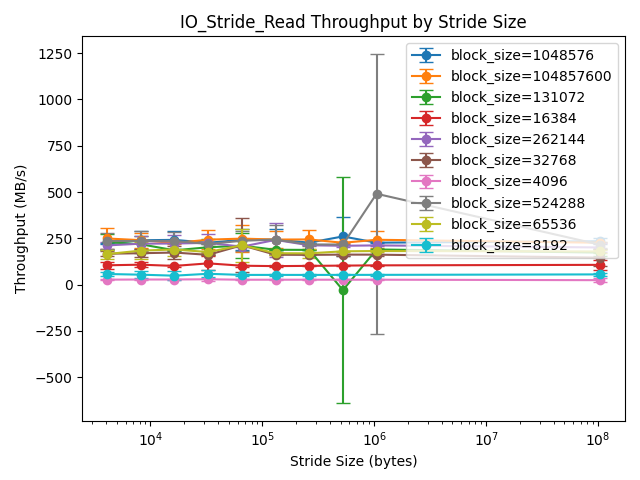

In [ ]:
file_path = 'graphs/IO_Stride_Read_Device_0.png'
display(Image(filename=file_path))
file_path = 'graphs/IO_Stride_Read_Device_1.png'
display(Image(filename=file_path))

### Graph 3 Observations
This graph examines the impact of stride size on read throughput for different block sizes. Throughput remains stable across stide sizes for all block sizes, with one outlier at a stride size of about $10^6$ bytes causing a dip in performance. However, block size has a major impact on the throughput of IO stride reads. Larger block sizes report higher mean throughputs, showing increases from throughputs in 20's MB/s to the 200's MB/s. The key difference to note here is for the first graph, corresponding to HDD, the maximum throughput it exhibits is around 220 MB/s, whereas for the second graph, corresponding to SSD, the maximum throughput it exhibits is around 250 MB/s.

#### Key Takeaways:
- Stride size has minimal impact on throughput for most configurations, suggesting the system is efficient at handling varied access patterns.
- The outlier indicates potential inefficiencies at specific stride sizes, which might be due to hardware or system-level caching issues.
- Block size plays a major role in throughput here, and the maximum average throughput for SSD is higher than for HDD

---
### Test 4: Random I/O Write

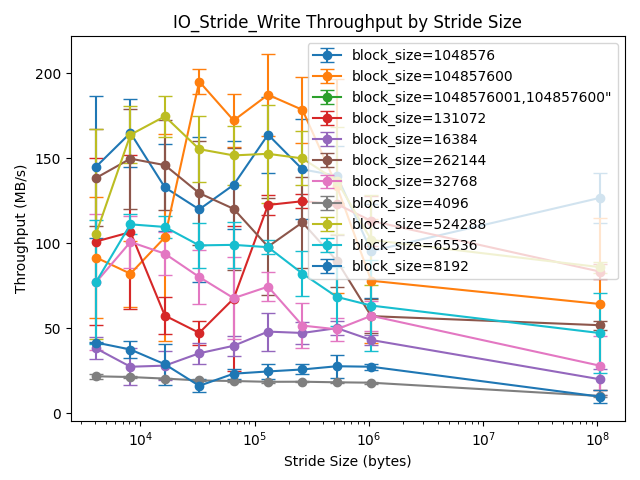

In [23]:
file_path = 'graphs/IO_Stride_Write_Device_1.png'
display(Image(filename=file_path))

### Graph 4 Observations
This graph examines the impact of stride size on write throughput for different block sizes. It is important to note that we only produced data for stride writes on SSD as we had issues with HDD. Throughput does not remains stable across stide sizes for all block size, indicating that there are certain optimal ranges at each block size and strize size for high throughput. Block size has a major impact on the throughput of IO stride writes. Larger block sizes report higher mean throughputs overall, but with large variability. 

#### Key Takeaways:
- Stride size has impact on throughput for most configurations, suggesting the system is efficient at handling varied access patterns for some block sizes, and is not efficient for others.
- Block size plays a major role in throughput here, and higher block size seems to have higher variability.

---
### Test 5: Random I/O Read

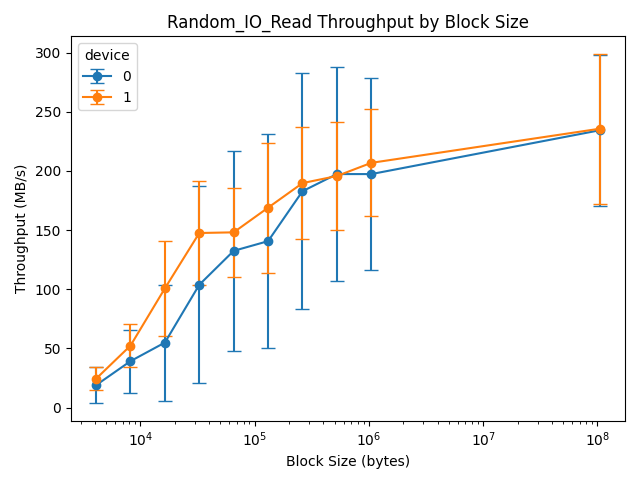

In [24]:
file_path = 'graphs/Random_IO_Read_Overlayed.png'
display(Image(filename=file_path))

### Graph 5 Observations
Random read throughput increases with block size, following a similar pattern to sequential reads. The stabilization occurs at $10^6$ bytes, with increaed variability compared to sequential reads. The difference in throughput between HDD and SSD does not seem to be too vital here as variability is also high, and the differences in means at each block size is small to moderate. At higher block sizes, throughout for both devices follows similar means.

#### Key Takeaways:
- Larger block sizes are beneficial even for random reads, likely due to reduced seek times and better utilization of the I/O subsystem.
- SSD seems to have slightly higher throughput and lower variability compared to HDD at corresponding block sizes.|

---
### Test 6: Random I/O Write

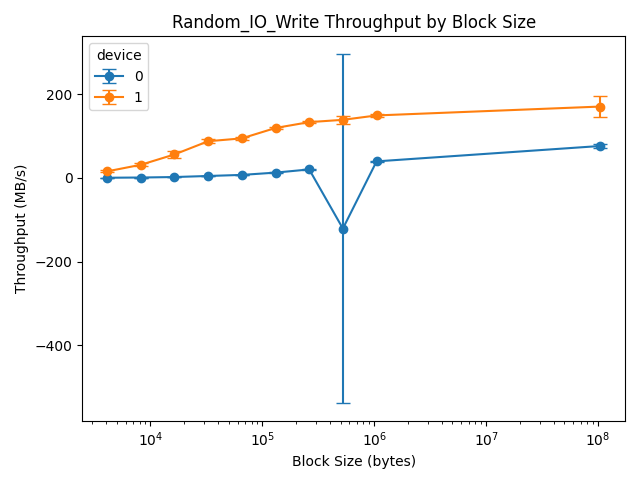

In [25]:
file_path = 'graphs/Random_IO_Write_Overlayed.png'
display(Image(filename=file_path))


### Graph 5: Random_IO_Write Throughput by Block Size (Device 0)
Random writes show a steady increase in throughput with block size for SSD and a lower increase in throughput for HDD, but with significant variability around $10^6$ bytes, where throughput dips before stabilizing for HDD.

#### Key Takeaways:
- Random writes are have higher throughput at higher block sizes, with optimal performance achieved at $10^6$ bytes or larger.
- The high variability indicates potential bottlenecks, such as cache contention or write amplification effects.
- SSD outperforms HDD in throughput for all block sizes.

---
## General Observations and Design Implications
1. **Optimal I/O Size**: Across all tests, an optimal block size of around $10^6$ bytes consistently delivers high throughput for both reads and writes. Smaller block sizes incur higher overhead, while larger sizes provide diminishing returns. This is true for both HDD and SSD.
   
2. **Reads vs. Writes**: Read operations generally outperform writes, likely due to less overhead and fewer integrity checks. Systems should account for this when designing for write-heavy workloads.

3. **Sequential vs. Random Access**: While random access shows slightly lower throughput than sequential access, the trends are similar which indicates that modern devices handle random patterns efficiently.

4. **HDDs vs. SSDs**: SSDs outperform HDDs in average throughput and variability in almost every case. Designers should be aware of this increase in performance and decide when it is beneficial to use SSD, even if it may be costlier in some cases.

By leveraging these insights, system designers can make informed decisions to balance performance and efficiency for their specific use cases.

---

### Challenge Problem: 
*Use a Student's T-test or another statistical hypothesis test (as you see fit) to calculate how many samples are needed for each experiment. In your write-up, explain your methodology, show some example calculations, and include a table of the number of experiments required for each data point.*


Below are tables corresponding to each test and data value seen in the graphs above, as well as an estimated number of required samples needed for each experiement.


In [26]:
import pandas as pd

data_file = 'results/required_samples.csv'
df = pd.read_csv(data_file)

def display_markdown_tables(df):
    grouped = df.groupby('test_type')
    for test_type, group in grouped:
        print(f"### Test Type {test_type}")
        print()
        print(group[['device', 'block_size', 'stride_size', 'required_samples']].to_markdown(index=False))
        print()

display_markdown_tables(df)

### Test Type 0

|   device |   block_size |   stride_size |   required_samples |
|---------:|-------------:|--------------:|-------------------:|
|        0 |      1048576 |             0 |                 44 |
|        0 |    104857600 |             0 |                 54 |
|        0 |       131072 |             0 |                 62 |
|        0 |        16384 |             0 |                 12 |
|        0 |       262144 |             0 |                 46 |
|        0 |        32768 |             0 |                 81 |
|        0 |         4096 |             0 |                250 |
|        0 |       524288 |             0 |                  5 |
|        0 |        65536 |             0 |                 24 |
|        0 |         8192 |             0 |                  6 |
|        1 |      1048576 |             0 |                 59 |
|        1 |    104857600 |             0 |                 84 |
|        1 |       131072 |             0 |                  5 |
|       